In [1]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from utils.utilities import bootstrap_all_distance_metrics, gen_feature_dict_lasso
from utils.plots import plot_confidence_interval


In [2]:
pipe = Pipeline([("StandardScaler",StandardScaler()),("Lasso_regressor",LassoCV(max_iter= 10000))])
param_grid = {}
s = bootstrap_all_distance_metrics(pipe, param_grid, n = 10)

number of sample runs: 10
loading in data
running bootstrap
0


from collections import defaultdict
import os
from utils.utilities import remove_outside_confidence_interval
def gen_feature_dict_lasso(bootstrap_results, with_dist = False, all_distance = False):
    param_list = [x.best_estimator_.steps[-1][-1].coef_ for x in bootstrap_results]
    feature_list = []
    for file in os.listdir("data/fb_data/"):
        if all_distance:
            if (file.endswith(".csv")) and ("_" in file):
                #print(file)
                feature = file.replace(".csv","")
                feature_list.append(feature)
        else:
            if ("CosDist" in file) and (file.endswith(".csv")) and (file != "FBCosDist.csv"):
                feature = file.split("_")[1]
                feature = feature.replace(".csv","")
                feature_list.append(feature)
    if with_dist == True:
        feature_list.append("distance")
    d = defaultdict(list)
    for run in param_list:
        for feature, value in zip(feature_list,run):
            #print(feature)
            d[feature].append(value)
    #Removes values outside n% confidence interval
    for key, val in d.items():
        n = 0.95
        d[key] = remove_outside_confidence_interval(n,val)
    return d

In [3]:
from utils.utilities import gen_feature_dict_lasso

In [4]:
feature_dict = gen_feature_dict_lasso(s, with_dist=True, all_distance= True)
feature_dict = dict( sorted(feature_dict.items(), key=lambda x: x[0].lower()) )

In [5]:
feature_dict

{'FBCosDist_BusinessIndustry': [-0.053176307241965946,
  -0.05178971895246901,
  -0.03380179879908961,
  -0.02812765477279686,
  -0.025499418622764315,
  -0.02473683644743509,
  -0.02023028473249192,
  -0.01647123737835542,
  -0.00487174137247036,
  0.0],
 'FBCosDist_Education': [-0.02732366238816251,
  -0.0,
  -0.0,
  -0.0,
  0.0,
  -0.0,
  0.0,
  0.0007744434984938663,
  0.00259982989769021,
  0.0173138448420445],
 'FBCosDist_FamilyRelationships': [0.08108023652303008,
  0.1073440853508319,
  0.13572378950436942,
  0.15143417213083094,
  0.22620598176699303,
  0.23771059297441752,
  0.27681767838261967,
  0.33682144585339435,
  0.3672510094537193,
  0.3859174484661175],
 'FBCosDist_FitnessWellness': [-0.38902310534473866,
  -0.380178829216356,
  -0.37687840183923754,
  -0.37597911879873713,
  -0.3457471432199835,
  -0.3054874447168883,
  -0.2948509277974983,
  -0.29480574620400696,
  -0.2798301818818528,
  -0.23146840334321336],
 'FBCosDist_FoodDrink': [-0.019590878159543915,
  -0.01

/home/tjuppen/Documents/GitHub/Bachelor/utils/plots.py:85: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color='orange')


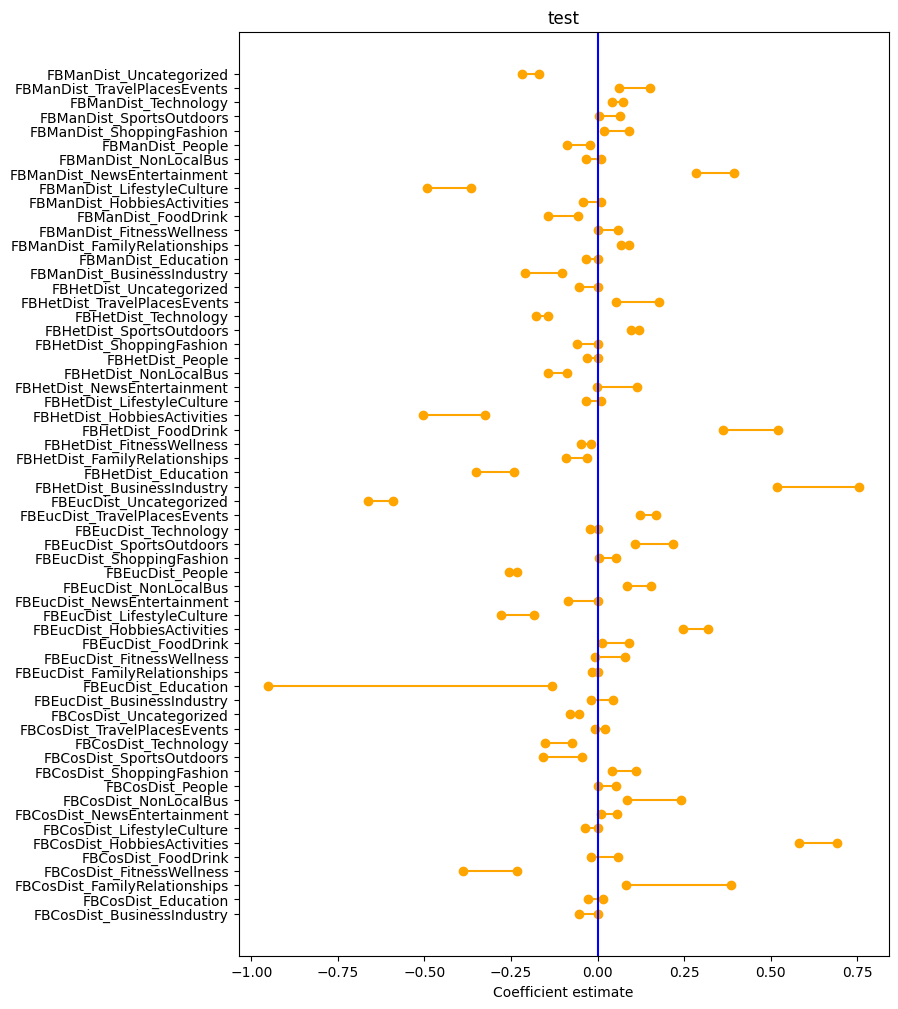

In [6]:
plot_confidence_interval(feature_dict,"test")

In [2]:
from src.drivers.plots.plot_confidence_rf_all_dist_metrics import confidence_plot_rf_with_dist_all_metrics
confidence_plot_rf_with_dist_all_metrics()

number of sample runs: 10
loading in data
running bootstrap
0


KeyboardInterrupt: 

In [8]:
#from src.drivers.train_models.all_distance_metrics_without_pca import run 
#run()